In [4]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams

In [5]:
# Matplotlib font configuration
rcParams['font.size'] = 16
rcParams['font.weight'] = 'normal'
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True

COLOR_MAP = {
    'SBSMU': '#00429d',
    'MU': '#93003a',
    'EGD': '#93003a',
    'PSGD': '#93003a'
}

LINESTYLE_MAP = {
    'SBSMU': 'solid',
    'MU': 'dashed',
    'EGD': 'dotted',
    'PSGD': 'dashdot'
}

# MNIST

In [64]:
def get_data():
    """Generate dict with losses and st.devs. for each algorithm, print final loss"""
    with open('mnist.pkl', 'rb') as handle:
        data = pickle.load(handle) 
    times = np.linspace(0, 600, num=6001)
    processed_data = {}
    
    # Calculate data for each algorithm
    for alg, trials in data.items():
        losses = []
        stds = []
        
        # Find the mean loss and std.dev. at each time
        for t in times:
            t_losses = []
            for trial in trials.values():
                # Find first loss in trial at time greater than or equal to current time
                n = len(trial['times'])
                i = next(i for i in range(n - 1, -1, -1) if t >= trial['times'][i])
                t_losses.append(trial['losses'][i])
            losses.append(np.mean(t_losses))
            stds.append(np.std(t_losses))
        processed_data[alg] = {'losses': np.array(losses), 'stds': np.array(stds)}
        
    # Find the final loss for each algorithm, including st.dev.
    for alg, trials in data.items():
        min_losses = [min(t['losses']) for t in trials.values()]
        mean = "{:.3e}".format(np.mean(min_losses))
        exp = 10 ** int(mean[-2:])
        std = round(np.std(min_losses) / exp, 3)
        print(f"{alg}: Minimum loss {mean}, St.dev {std}")
            
    return processed_data

DATA = get_data()

PSGD: Minimum loss 6.437e+09, St.dev 0.089
MU: Minimum loss 6.424e+00, St.dev 0.021
EGD: Minimum loss 6.398e+00, St.dev 0.024
SBSMU: Minimum loss 6.483e+00, St.dev 0.015


### Plot data

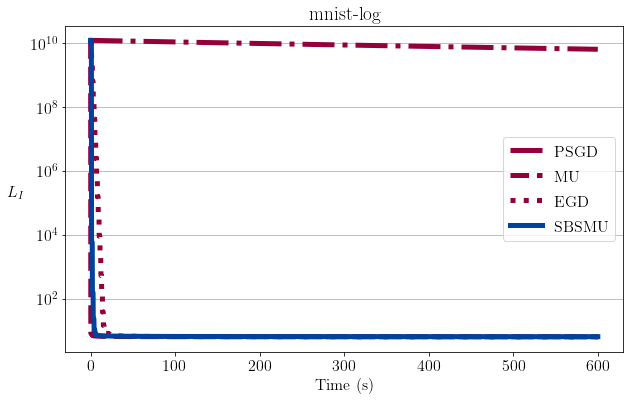

In [58]:
times = np.linspace(0, 600, num=6001)
fig, ax =  plt.subplots(figsize=(10,6))    
ax.xaxis.set_label_text('Time (s)')

# Format y-axis label
ax.yaxis.set_label_text(r'$L_I$', rotation=0)
ax.yaxis.set_label_coords(-0.09, 0.47)

# Format y-axis grid and ticks
ax.set_yscale('log')
ax.grid(which='both', axis='y')
formatter = ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_powerlimits((0,0))


# Plot the results for each algorithm
for alg, res in DATA.items():
    losses = res['losses']
    color = COLOR_MAP[alg]
    linestyle = LINESTYLE_MAP[alg]
    ax.plot(times, losses, color=color, linestyle=linestyle, label=alg, linewidth=5)

ax.legend()
    
# Save figure as pdf
title = 'mnist-log'
fig.savefig(f"figs/{title}.pdf".lower(), bbox_inches='tight')

ax.set_title(title)
plt.show()

### Plot data except PSGD

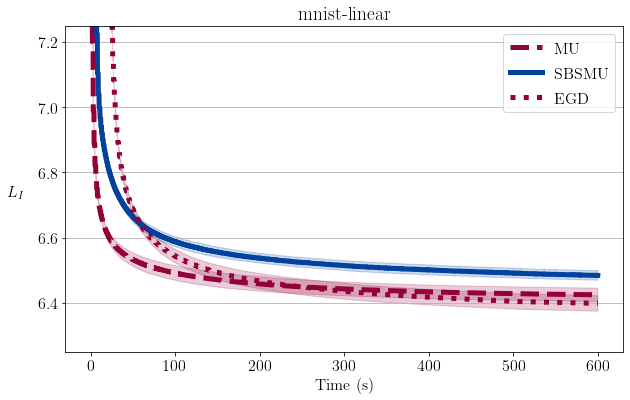

In [72]:
times = np.linspace(0, 600, num=6001)
fig, ax =  plt.subplots(figsize=(10,6))    
ax.xaxis.set_label_text('Time (s)')

# Format y-axis label
ax.yaxis.set_label_text(r'$L_I$', rotation=0)
ax.yaxis.set_label_coords(-0.09, 0.47)

# Format y-axis grid and ticks
ax.grid(which='both', axis='y')
ax.set_ylim(6.25, 7.25)
formatter = ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_powerlimits((0,0))


# Plot the results for each algorithm
algs = ['MU', 'SBSMU', 'EGD']
for alg in algs:
    res = DATA[alg]
    losses = res['losses']
    stds = res['stds']
    color = COLOR_MAP[alg]
    linestyle = LINESTYLE_MAP[alg]
    ax.plot(times, losses, color=color, linestyle=linestyle, label=alg, linewidth=5)
    ax.fill_between(times, losses - stds, losses + stds, color=color, alpha=0.2)

ax.legend()
    
# Save figure as pdf
title = 'mnist-linear'
fig.savefig(f"figs/{title}.pdf".lower(), bbox_inches='tight')


ax.set_title(title)
plt.show()

# Higgs

In [61]:
def get_data():
    """Generate dict with losses and st.devs. for each algorithm, print final loss"""
    with open('higgs.pkl', 'rb') as handle:
        data = pickle.load(handle) 
    processed_data = {}
    
    # Calculate data for each algorithm
    for alg, run in data.items():
        run = run[1244102535]
        processed_data[alg] = {'losses': np.array(run['losses']), 'times': np.array(run['times'])}
        
    # Find the final loss for each algorithm, including st.dev.
    for alg, run in data.items():
        run = run[1244102535]
        min_loss = round(min(run['losses']), 3)
        print(f"{alg}: Minimum loss {min_loss}")
            
    return processed_data

DATA = get_data()

SBSMU: Minimum loss 82.63
MU: Minimum loss 13.214


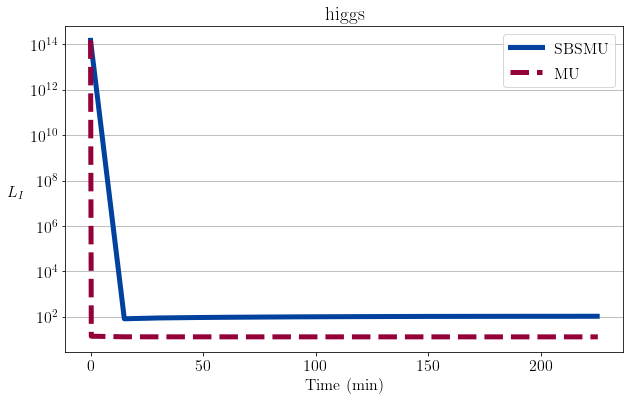

In [62]:
fig, ax =  plt.subplots(figsize=(10,6))   

# Format x-axis
ax.xaxis.set_label_text('Time (min)')

# Format y-axis
ax.yaxis.set_label_text(r'$L_I$', rotation=0)
ax.yaxis.set_label_coords(-0.09, 0.47)
ax.set_yscale('log')
ax.grid(which='both', axis='y')
formatter = ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_powerlimits((0,0))


# Plot the results for each algorithm
for alg, res in DATA.items():
    losses = res['losses']
    times = res['times'] / 60
    color = COLOR_MAP[alg]
    linestyle = LINESTYLE_MAP[alg]
    ax.plot(times, losses, color=color, linestyle=linestyle, label=alg, linewidth=5)

ax.legend()

# Save figure as pdf
title = 'higgs'
fig.savefig(f"figs/{title}.pdf".lower(), bbox_inches='tight')

ax.set_title(title)
plt.show()